In [1]:
import numpy as np 
import pandas as pd

import scipy.stats as stats # for QQ plot .

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("C:/Users/NIKUNJ KIKANI/Desktop/machine learning/pipeline/Book2.csv",usecols
                 =['Age','Fare','Survived'])

In [3]:
df.sample(5)

,Survived,Age,Fare
308,0,30.0,24.0000
517,0,NaN,24.1500
124,0,54.0,77.2875
89,0,24.0,8.0500
157,0,30.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [6]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [7]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


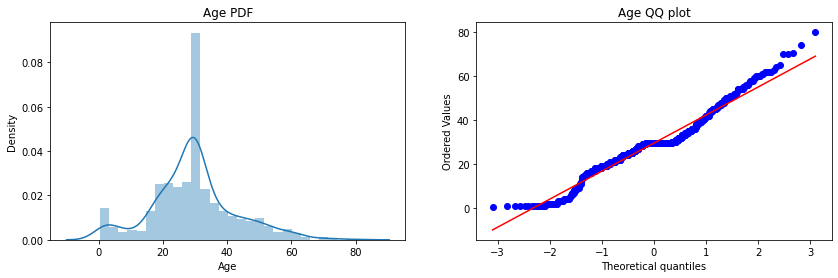

In [8]:
# we find that ki over data is distributed normally or not .

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ plot')

plt.show()

C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


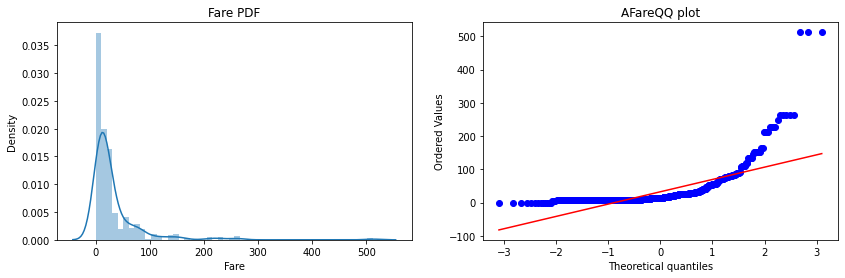

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('AFareQQ plot')

plt.show()

In [10]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [11]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

print("Accuracy LR:",accuracy_score(y_test,y_pred))
print("Accuracy DT:",accuracy_score(y_test,y_pred2))

Accuracy LR: 0.6480446927374302
Accuracy DT: 0.6759776536312849


In [12]:
# using log transformer and cheque ki over model improves or not. 

In [13]:
trf = FunctionTransformer(func=np.log1p)

In [14]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed  = trf.fit_transform(x_test)

In [15]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred2 = clf2.predict(x_test_transformed)

print("Accuracy LR :",accuracy_score(y_test,y_pred))
print("Accuracy DT :",accuracy_score(y_test,y_pred2))

Accuracy LR : 0.6815642458100558
Accuracy DT : 0.6703910614525139


In [16]:
# without FuFunctionTransformer

# Accuracy LR: 0.6480446927374302
# Accuracy DT: 0.6759776536312849
    
# using FuFunctionTransformer

# Accuracy LR : 0.6815642458100558
# Accuracy DT : 0.6703910614525139

In [17]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2= DecisionTreeClassifier()

print("LR:",np.mean(cross_val_score(clf,x_transformed,y,scoring="accuracy",cv=10)))
print("DT:",np.mean(cross_val_score(clf2,x_transformed,y,scoring="accuracy",cv=10)))

LR: 0.678027465667915
DT: 0.6588389513108615


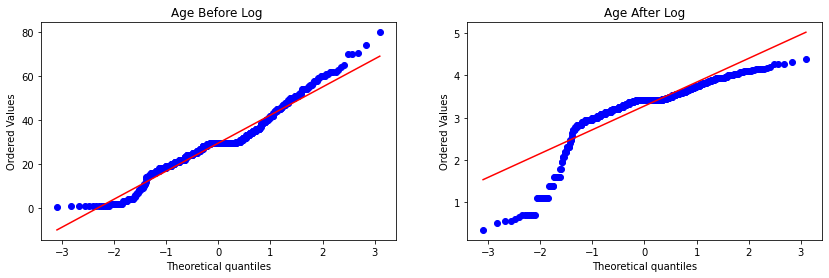

In [18]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age Before Log ')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist="norm",plot=plt)
plt.title('Age After Log')

plt.show()

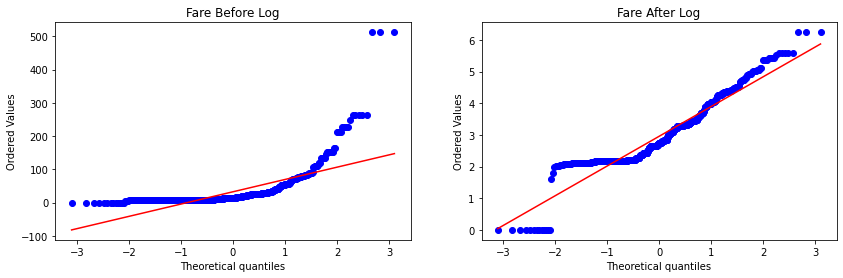

In [19]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist="norm",plot=plt)
plt.title('Fare After Log')

plt.show()

In [20]:
#now don'use function-transformer in Age Data.  

trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2  = trf2.fit_transform(x_test)

In [21]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)

y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)

print("Accuracy LR :",accuracy_score(y_test,y_pred))
print("Accuracy DT :",accuracy_score(y_test,y_pred2))

Accuracy LR : 0.6703910614525139
Accuracy DT : 0.6480446927374302


In [22]:
def apply_transform(tranform):
    x = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(tranform),['Fare'])],remainder='passthrough')
    
    x_trans = trf.fit_transform(x)
    
    clf = LogisticRegression()
    
    print("Accuracy LR:",np.mean(cross_val_score(clf,x_trans,y,scoring="accuracy",cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(x_train['Fare'],dist="norm",plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(x_trans[:,0],dist="norm",plot=plt)
    plt.title('Fare After Transform')

    plt.show()


Accuracy LR: 0.6589013732833957


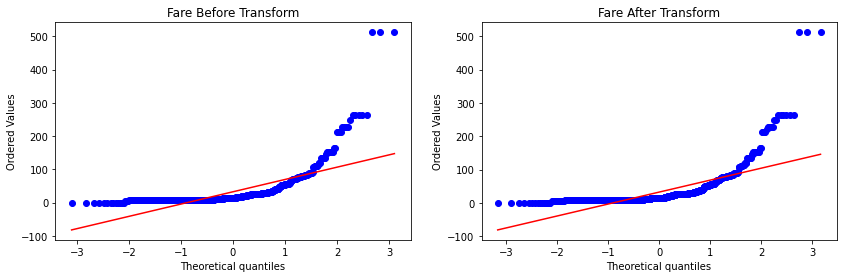

In [23]:
# NO transformation applied . 
apply_transform(lambda x : x )

Accuracy LR: 0.61729088639201


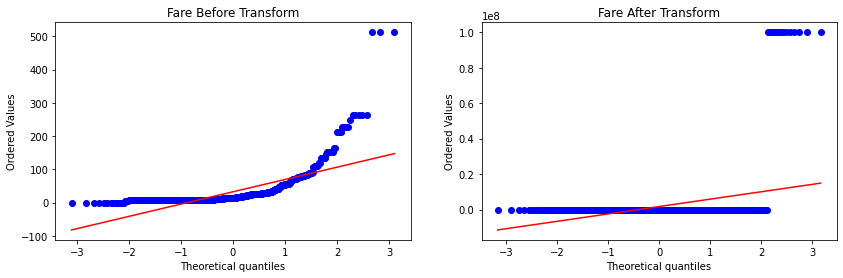

In [24]:
#  Reciprocal Transformation .
apply_transform(lambda x : 1/(x+0.00000001))